In [2]:
# !python -m pip install mlagents==0.28.0
# !python -m pip install gym
# !cd "/Users/aditya/Documents/GitHub/game_creation_research/ml-agents/gym-unity" && pip3 install -e .

import random
import joblib
from PlaceAndShootGym import *
from GAME_1_SOLVER import *
from GAME_2_SOLVER import *
from GAME_3_SOLVER import *
from GAME_4_SOLVER import *
from GAME_5_SOLVER import *
from GAME_NULL_SOLVER import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [11]:
GAME_1_ENV_PATH = "results/GAME_1/GAME_1_SOLVED.joblib"
GAME_2_ENV_PATH = "results/GAME_2/GAME_2_SOLVED.joblib"
# GAME_3_ENV_PATH = "results/GAME_3_SOLVED.joblib"
# GAME_4_ENV_PATH = "results/GAME_4_SOLVED.joblib"
GAME_5_ENV_PATH = "results/GAME_5/GAME_5_SOLVED.joblib"
# GAME_NULL_ENV_PATH = "results/GAME_NULL_SOLVED.joblib"

GAME_1_ENV = joblib.load(GAME_1_ENV_PATH)
GAME_2_ENV = joblib.load(GAME_2_ENV_PATH)
# GAME_3_ENV = joblib.load(GAME_3_ENV_PATH)
# GAME_4_ENV = joblib.load(GAME_4_ENV_PATH)
GAME_5_ENV = joblib.load(GAME_5_ENV_PATH)
# GAME_NULL_ENV = joblib.load(GAME_NULL_ENV_PATH)


In [ ]:
# settings_from_actual_run = {"setup": [[0, 0, -0.249, 0.522, 'gear', False],
#                                       [0, 0, 0.246, 0.799, 'gear', False],
#                                       [0, 0, -0.563, -0.091, 'corner', False],
#                                       [0, 0, 0, 0, None, True]],
#                             "x_range":  (-0.5, -0.3),
#                             "y_range":  (0.12, 0.32),
#                             "required_percent_of_shots_in_chosen_zone":  0.23}


In [ ]:
# GAME_NULL_REWARD.__setattr__("x_limit", settings_from_actual_run["x_range"][0])
# GAME_NULL_REWARD.__setattr__("y_limit", settings_from_actual_run["y_range"][0])
# GAME_NULL_REWARD.__setattr__("setup_array", settings_from_actual_run["setup"])


In [12]:
playabilities = {}

playabilities["GAME_1"] = len(GAME_1_ENV.winning_shots)/GAME_1_ENV.num_tries
print("Playability GAME_1: ", round(playabilities["GAME_1"], 4))

playabilities["GAME_2"] = len(GAME_2_ENV.winning_shots)/GAME_2_ENV.num_tries
print("Playability GAME_2: ", round(playabilities["GAME_2"], 4))

# playabilities["GAME_3"] = len(GAME_3_ENV.winning_shots)/GAME_3_ENV.num_tries
# print("Playability GAME_3: ", round(playabilities["GAME_3"], 4))

# playabilities["GAME_4"] = len(GAME_4_ENV.winning_shots)/GAME_4_ENV.num_tries
# print("Playability GAME_4: ", round(playabilities["GAME_4"], 4))

playabilities["GAME_5"] = len(GAME_5_ENV.winning_shots)/GAME_5_ENV.num_tries
print("Playability GAME_5: ", round(playabilities["GAME_5"], 4))


Playability GAME_1:  0.1892
Playability GAME_2:  0.0425
Playability GAME_5:  0.0321


In [ ]:
def replayWinningShots(winning_shots, quiet=False):
    for shot in winning_shots:
        # reset
        env.step([0, 0, 0, 0, 0, 1], quiet=True)
        # place
        place = Action(shot["place_action"])
        place.transformed = True
        env.step(place, quiet=quiet)
        # shoot
        shoot = Action(shot["shoot_action"])
        shoot.transformed = True
        env.step(shoot, quiet=quiet)
        print(f"Reward: {shot['reward']}")


In [ ]:
try:
    env.close()
except:
    pass

SERVER_BUILD = "../Builds/MLAgent_View_21April22_server.app"
GYM_BUILD = "../Builds/Gym_View_12May22.app"

channel = EngineConfigurationChannel()
channel.set_configuration_parameters(time_scale=5, quality_level=0)
unity_env = UnityEnvironment(
    file_name=GYM_BUILD, seed=1, side_channels=[channel], worker_id=2)

# unity_env = UnityEnvironment()

unity_env.reset()
gym_env = UnityToGymWrapper(unity_env, allow_multiple_obs=False)
env = GAME_2_ENV
env.gym_env = gym_env


In [ ]:
env.setup(GAME_2_ENV.setup_array)


In [ ]:
GAME_1_ENV.winning_shots[0]


In [ ]:
shots_to_play = random.sample(GAME_2_ENV.winning_shots, 50)
# shots_to_play = GAME_2_ENV.winning_shots
replayWinningShots(shots_to_play, quiet=False)


In [ ]:
rewards = [shot["reward"] for shot in GAME_NULL_ENV.winning_shots]


In [ ]:
plt.hist(rewards)


In [ ]:
env.close()


In [3]:
setup_data = pd.read_csv(
    "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/human_data/setup_difficulty_scores.csv")
play_data = pd.read_csv(
    "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/human_data/play_difficulty_scores.csv")


In [23]:
setup_data

,id,name,game_num,difficulty,normed_difficulty,listed
0,1,Ingrid,GAME_1,6.0,0.000000,0.000000
1,1,Ingrid,GAME_2,7.0,0.333333,0.333333
2,1,Ingrid,GAME_3,7.0,0.333333,0.333333
3,1,Ingrid,GAME_4,6.0,0.000000,0.000000
4,1,Ingrid,GAME_5,9.0,1.000000,1.000000
5,2,Chhavi,GAME_1,6.0,0.500000,0.500000
6,2,Chhavi,GAME_2,7.0,0.750000,0.750000
7,2,Chhavi,GAME_3,4.0,0.000000,0.000000
8,2,Chhavi,GAME_4,4.0,0.000000,0.000000
9,2,Chhavi,GAME_5,8.0,1.000000,1.000000


In [4]:
participants = list(setup_data["name"].unique())
participants


['Ingrid',
 'Chhavi',
 'Nav',
 'Adi',
 'Buz',
 'Kieran',
 'josh',
 'Eli',
 'Curi',
 'Tamas']

In [5]:
scaler = MinMaxScaler()

scaled_data = []
for each_participant in participants:
    scaled_data.append(scaler.fit_transform(np.array(
        setup_data[setup_data["name"] == each_participant]["difficulty"]).reshape(-1, 1)))
setup_data["normed_difficulty"] = np.concatenate(scaled_data)

scaled_data = []
for each_participant in participants:
    scaled_data.append(scaler.fit_transform(np.array(
        play_data[play_data["name"] == each_participant]["difficulty"]).reshape(-1, 1)))
play_data["normed_difficulty"] = np.concatenate(scaled_data)


/opt/anaconda3/envs/introml_conda/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/envs/introml_conda/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [13]:
setup_data["listed"] = setup_data["normed_difficulty"]
play_data["listed"] = play_data["normed_difficulty"]
agg_setup = setup_data.groupby("game_num").agg({"normed_difficulty": np.mean, "listed":list})
agg_play = play_data.groupby("game_num").agg({"normed_difficulty": np.mean, "listed":list})


In [14]:
diff_df = pd.DataFrame()
diff_df["agg_setup"] = agg_setup["normed_difficulty"]
diff_df["agg_play"] = agg_play["normed_difficulty"]
diff_df["setup_list"] = agg_setup["listed"]
diff_df["play_list"] = agg_play["listed"]
for each_game in playabilities:
    diff_df.loc[each_game, "playability"] = playabilities[each_game]
diff_df.fillna(0, inplace=True)
diff_df


,agg_setup,agg_play,setup_list,play_list,playability
game_num,,,,,
GAME_1,0.148148,0.445000,"[0.0, 0.5, 0.0, 0.33333333333333326, 0.0, 0.0,...","[1.0, 0.75, 0.0, 0.75, 0.0, 0.0, 0.0, 0.199999...",0.189167
GAME_2,0.629365,0.630000,"[0.33333333333333304, 0.75, 0.1999999999999999...","[1.0, 0.25, 0.8333333333333333, 1.0, 1.0, 0.33...",0.042546
GAME_3,0.532804,0.466667,"[0.33333333333333304, 0.0, 0.19999999999999996...","[0.8333333333333333, 0.0, 0.8333333333333333, ...",0.000000
GAME_4,0.226190,0.676667,"[0.0, 0.0, 1.0, 0.0, 0.25, 0.0, 0.5, 0.2857142...","[0.0, 1.0, 1.0, 0.0, 0.5, 1.0, 1.0, 0.60000000...",0.000000
GAME_5,0.800000,0.612500,"[1.0, 1.0, 0.19999999999999996, 0.833333333333...","[0.8333333333333333, 0.625, 1.0, 0.5, 0.75, 0....",0.032060


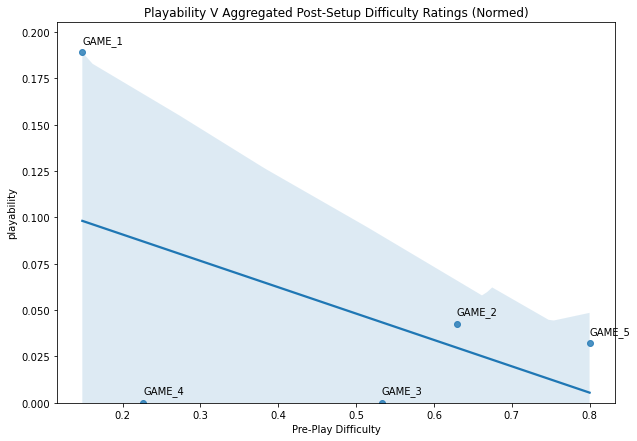

In [18]:
plt.figure(figsize=(10, 7))
sns.regplot(x="agg_setup", y="playability", data=diff_df)
plt.title("Playability V Aggregated Post-Setup Difficulty Ratings (Normed)")
plt.xlabel("Pre-Play Difficulty")
plt.ylim(bottom = 0)
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['agg_setup'], point['playability'] + 0.005, str(i))
plt.show()


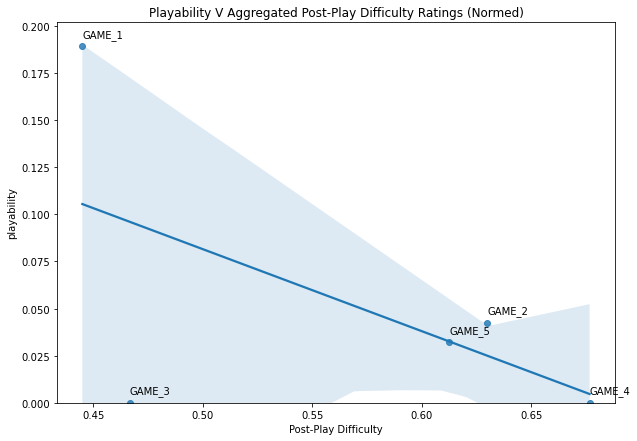

In [17]:
plt.figure(figsize=(10, 7))
sns.regplot(x="agg_play", y="playability", data=diff_df)
plt.title("Playability V Aggregated Post-Play Difficulty Ratings (Normed)")
plt.xlabel("Post-Play Difficulty")
plt.ylim(bottom = 0)
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point["agg_play"], point['playability'] + 0.005, str(i))
plt.show()


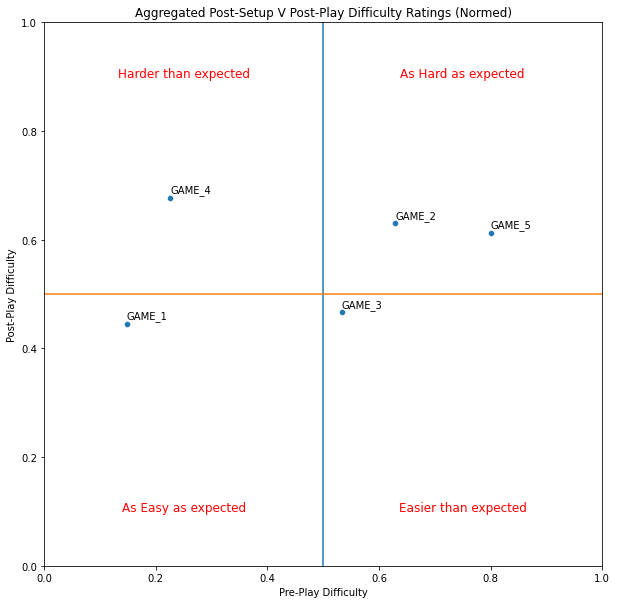

In [19]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="agg_setup", y="agg_play", data=diff_df)
plt.xlim(0, 1)
plt.ylim(0, 1)
line1_start, line1_end = [0.5, 0.5], [0, 1]
line2_start, line2_end = [0, 1], [0.5, 0.5]
plt.plot(line1_start, line1_end, line2_start, line2_end)
plt.annotate("Harder than expected", xy = (0.25, 0.9), horizontalalignment = "center", fontsize = "large", color="red")
plt.annotate("As Hard as expected", xy = (0.75, 0.9), horizontalalignment = "center", fontsize = "large", color="red")
plt.annotate("As Easy as expected", xy = (0.25, 0.1), horizontalalignment = "center", fontsize = "large", color="red")
plt.annotate("Easier than expected", xy = (0.75, 0.1), horizontalalignment = "center", fontsize = "large", color="red")
plt.title("Aggregated Post-Setup V Post-Play Difficulty Ratings (Normed)")
plt.xlabel("Pre-Play Difficulty")
plt.ylabel("Post-Play Difficulty")
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['agg_setup'], point['agg_play'] + 0.01, str(i))
plt.show()


In [22]:
exploded_df = diff_df.explode(["setup_list", "play_list"])
exploded_df

,agg_setup,agg_play,setup_list,play_list,playability
game_num,,,,,
GAME_1,0.148148,0.445000,0.0,1.0,0.189167
GAME_1,0.148148,0.445000,0.5,0.75,0.189167
GAME_1,0.148148,0.445000,0.0,0.0,0.189167
GAME_1,0.148148,0.445000,0.333333,0.75,0.189167
GAME_1,0.148148,0.445000,0.0,0.0,0.189167
GAME_1,0.148148,0.445000,0.0,0.0,0.189167
GAME_1,0.148148,0.445000,0.0,0.0,0.189167
GAME_1,0.148148,0.445000,0.0,0.2,0.189167
GAME_1,0.148148,0.445000,0.5,1.0,0.189167


In [ ]:
exploded_df = 
plt.figure(figsize=(10, 7))
sns.regplot(x="setup_list", y="playability", data=diff_df)
plt.title("Playability V Aggregated Post-Setup Difficulty Ratings (Normed)")
plt.xlabel("Pre-Play Difficulty")
plt.ylim(bottom = 0)
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['setup_list'], point['playability'] + 0.005, str(i))
plt.show()
